In [10]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

salarycsv = "../Assignment/data/salaries.csv"
salary_db = pd.read_csv(salarycsv)

titlescsv = "../Assignment/data/titles.csv"
titles_db = pd.read_csv(titlescsv)


titles_db.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [2]:
salary_db['salary'].min()
salary_db['salary'].max()

129492

In [3]:
bins = [40000, 60000, 80000, 100000, 120000, 130000]
ranges = ['40-60k','60-80k','80-100k','100-120k','>120k']

In [4]:
salary_db["salary ranges"] = pd.cut(salary_db["salary"], bins, labels=ranges)
salary_db.head()

,emp_no,salary,from_date,to_date,salary ranges
0,10001,60117,1986-06-26,1987-06-26,60-80k
1,10002,65828,1996-08-03,1997-08-03,60-80k
2,10003,40006,1995-12-03,1996-12-02,40-60k
3,10004,40054,1986-12-01,1987-12-01,40-60k
4,10005,78228,1989-09-12,1990-09-12,60-80k


In [5]:
salary_grp = salary_db.groupby('salary ranges')
salaries = salary_grp.count()
salaries

,emp_no,salary,from_date,to_date
salary ranges,,,,
40-60k,121043,121043,121043,121043
60-80k,66219,66219,66219,66219
80-100k,16129,16129,16129,16129
100-120k,1263,1263,1263,1263
>120k,24,24,24,24


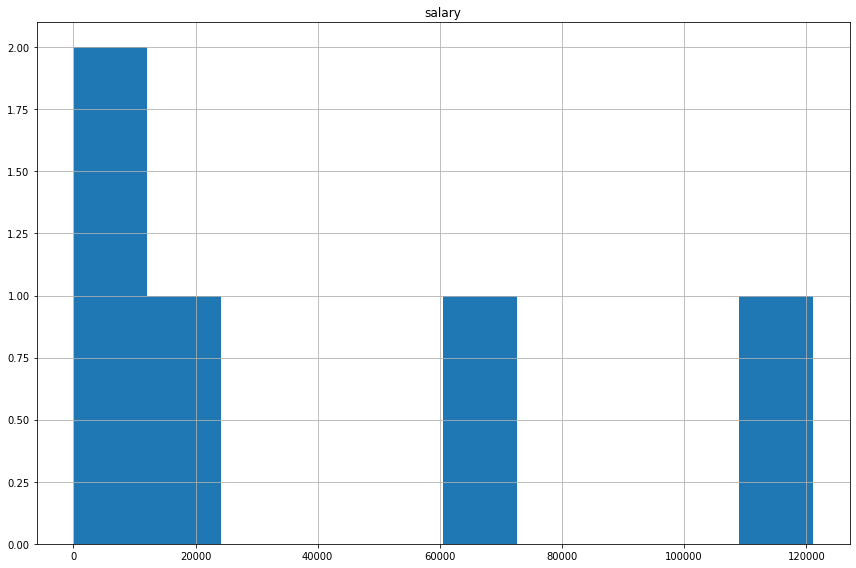

In [23]:
salary_graph = salaries.hist('salary', figsize = (12,8))
plt.tight_layout()
plt.show()


In [11]:
merge_df = pd.merge(salary_db, titles_db, on='emp_no')
merge_df.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [12]:
merge_grp = merge_df.groupby('title')
avg_sal = merge_grp.mean()
avg_sal

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


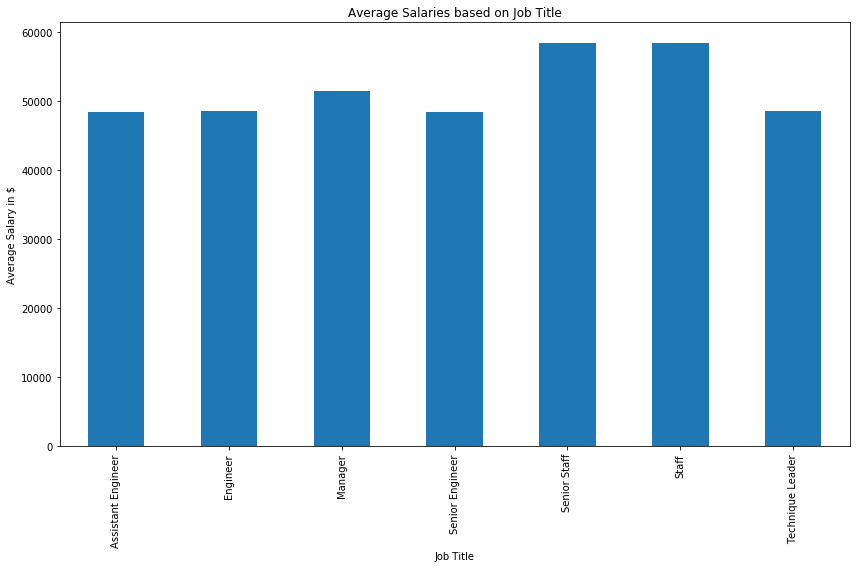

In [24]:
avg_graph = avg_sal.plot(kind='bar', figsize = (12,8), y='salary', legend = False)
avg_graph.set_xlabel("Job Title")
avg_graph.set_ylabel("Average Salary in $")
avg_graph.set_title("Average Salaries based on Job Title")
plt.tight_layout()
plt.show()